# Orientation management

Images have 4 corners and most acquisition software offer the ability to flip the image horizontally or vertically leading to 4 possible orientations.

The EXIF specification indicates orientation of each image. The first 4 orientation corresponds to vertical or horzontal flips which change the position of the origin:
 1. Top left when seen from the back of the camera 
 2. Top right when seen from the back of the camera , it becomes top-left when looking from the sample.
 3. Bottom right when seen from the back of the camera , it becomes bottom-left when looking from the sample.
 4. Bottom left when seen from the back of the camera
 5. transposed image: unsupported
 6. rotated image: unsupported
 7. transposed image: unsupported
 8. rotated image: unsupported

PyFAI does not support the images which are rotated (90° or 270°) or transposed images. 
The default orientation is **3** with the origin at the Bottom-Right (Bottom-Left when seen from the sample).

This tutorial demonstrates the image flipping and how it can be accounted when performing azimuthal integration.

## 1. Generate images with the 4 orientations:

In [1]:
%matplotlib inline
import time
import numpy
from matplotlib.pyplot import subplots
import pyFAI
from pyFAI.gui import jupyter
from pyFAI.test.utilstest import UtilsTest
t0 = time.perf_counter()
print(pyFAI.version)
unit = "q_nm^-1"

2023.12.0-dev0


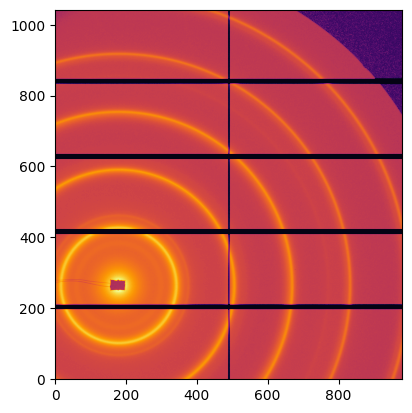

In [2]:
import fabio
img = fabio.open(UtilsTest.getimage("Pilatus1M.edf")).data
_=jupyter.display(img)

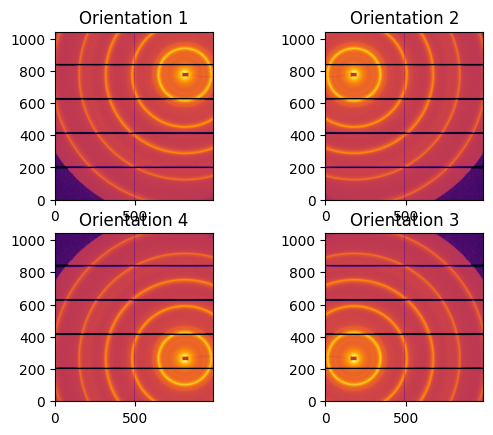

In [3]:
fig, ax = subplots(2, 2)
images = {3:img}
images[2] = numpy.flipud(img)
images[4] = numpy.fliplr(img)
images[1] = numpy.fliplr(images[2])
jupyter.display(images[1], ax=ax[0,0]).set_title("Orientation 1")
jupyter.display(images[2], ax=ax[0,1]).set_title("Orientation 2")
jupyter.display(images[3], ax=ax[1,1]).set_title("Orientation 3")
jupyter.display(images[4], ax=ax[1,0]).set_title("Orientation 4")
pass

## Initalize azimuthal integrator with different orientation:

In [4]:
ai = pyFAI.load(UtilsTest.getimage("Pilatus1M.poni"))
ais = {}

In [5]:
for o in range(1,5):
    aix = ai.__copy__()
    aix.detector = pyFAI.detector_factory("Pilatus1M", {"orientation": o})
    ais[o] = aix
    
ais

{1: Detector Pilatus 1M	 PixelSize= 1.720e-04, 1.720e-04 m	 TopLeft (1)
 Wavelength= 1.000000e-10 m
 SampleDetDist= 1.583231e+00 m	PONI= 3.341702e-02, 4.122778e-02 m	rot1=0.006487  rot2=0.007558  rot3=0.000000 rad
 DirectBeamDist= 1583.310 mm	Center: x=179.981, y=263.859 pix	Tilt= 0.571° tiltPlanRotation= 130.640° 𝛌= 1.000Å,
 2: Detector Pilatus 1M	 PixelSize= 1.720e-04, 1.720e-04 m	 TopRight (2)
 Wavelength= 1.000000e-10 m
 SampleDetDist= 1.583231e+00 m	PONI= 3.341702e-02, 4.122778e-02 m	rot1=0.006487  rot2=0.007558  rot3=0.000000 rad
 DirectBeamDist= 1583.310 mm	Center: x=179.981, y=263.859 pix	Tilt= 0.571° tiltPlanRotation= 130.640° 𝛌= 1.000Å,
 3: Detector Pilatus 1M	 PixelSize= 1.720e-04, 1.720e-04 m	 BottomRight (3)
 Wavelength= 1.000000e-10 m
 SampleDetDist= 1.583231e+00 m	PONI= 3.341702e-02, 4.122778e-02 m	rot1=0.006487  rot2=0.007558  rot3=0.000000 rad
 DirectBeamDist= 1583.310 mm	Center: x=179.981, y=263.859 pix	Tilt= 0.571° tiltPlanRotation= 130.640° 𝛌= 1.000Å,
 4: Detector P

## Perform the azimuthal integration

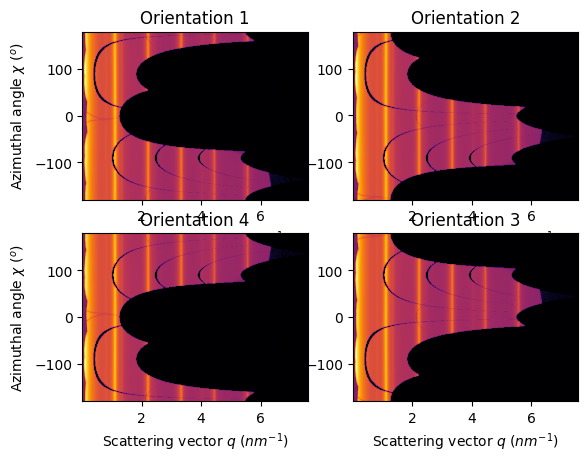

In [6]:
# With full pixel splitting:
method = ("full", "histogram", "cython")
fig, ax = subplots(2, 2)
jupyter.plot2d(ais[1].integrate2d(images[1],500, 360, method=method, unit=unit), ax=ax[0,0]).set_title("Orientation 1")
jupyter.plot2d(ais[2].integrate2d(images[2],500, 360, method=method, unit=unit), ax=ax[0,1]).set_title("Orientation 2")
jupyter.plot2d(ais[3].integrate2d(images[3],500, 360, method=method, unit=unit), ax=ax[1,1]).set_title("Orientation 3")
jupyter.plot2d(ais[4].integrate2d(images[4],500, 360, method=method, unit=unit), ax=ax[1,0]).set_title("Orientation 4")
pass

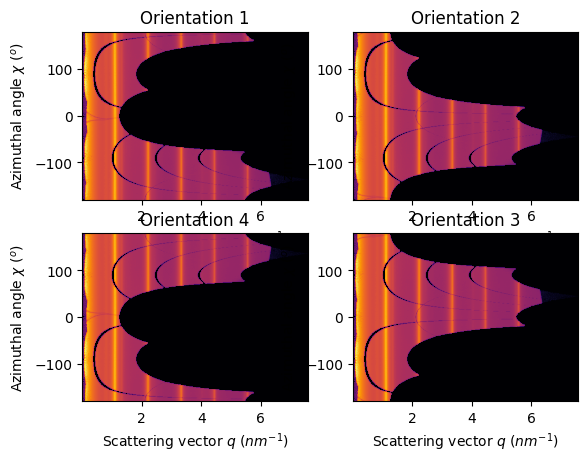

In [7]:
# Without pixel splitting:
method = ("no", "histogram", "cython")
fig, ax = subplots(2, 2)
jupyter.plot2d(ais[1].integrate2d(images[1],500, 360, method=method, unit=unit), ax=ax[0,0]).set_title("Orientation 1")
jupyter.plot2d(ais[2].integrate2d(images[2],500, 360, method=method, unit=unit), ax=ax[0,1]).set_title("Orientation 2")
jupyter.plot2d(ais[3].integrate2d(images[3],500, 360, method=method, unit=unit), ax=ax[1,1]).set_title("Orientation 3")
jupyter.plot2d(ais[4].integrate2d(images[4],500, 360, method=method, unit=unit), ax=ax[1,0]).set_title("Orientation 4")
pass

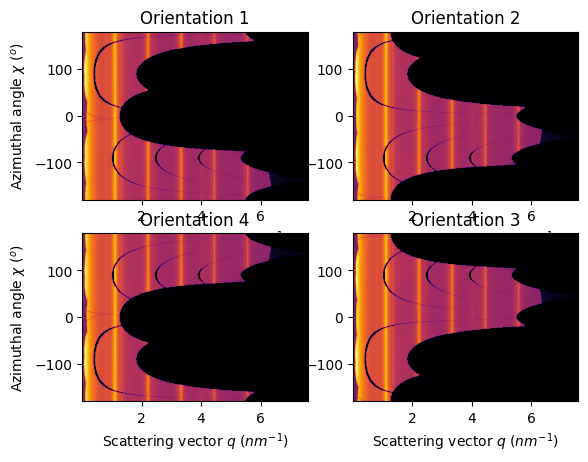

In [8]:
# Without bounding-box pixel splitting:
method = ("bbox", "histogram", "cython")
fig, ax = subplots(2, 2)
jupyter.plot2d(ais[1].integrate2d(images[1], 500, 360, method=method, unit=unit), ax=ax[0,0]).set_title("Orientation 1")
jupyter.plot2d(ais[2].integrate2d(images[2], 500, 360, method=method, unit=unit), ax=ax[0,1]).set_title("Orientation 2")
jupyter.plot2d(ais[3].integrate2d(images[3], 500, 360, method=method, unit=unit), ax=ax[1,1]).set_title("Orientation 3")
jupyter.plot2d(ais[4].integrate2d(images[4], 500, 360, method=method, unit=unit), ax=ax[1,0]).set_title("Orientation 4")
               
pass

In [9]:
print(f"Total run-time: {time.perf_counter()-t0:.3f}s")

Total run-time: 6.536s


## Conclusion

The PONI is valid from one geometry to another and the 1d azimuthal integration is the same. 
But the azimuthal angle does vary thus the 2D integration is mirrored for orientation 2 and 4 and offset by 180° for orientation 1.